In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
dff = pd.read_csv(r"D:\master of science\machie learning\project\tox21_global_cdf_rdkit.csv")
ssss=pd.read_csv(r"D:\master of science\machie learning\project\tox21 (2).csv")

In [24]:
dff.mask(dff.isna(), 0)
dataset=dff.iloc[:,1:]
sss=ssss.iloc[:,1:]
ss=sss.mask(sss.isna(), 0)

In [25]:
dataset

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,0.934799,0.177418,0.046765,0.033326,0.060566,0.039962,0.029073,0.141434,0.024657,0.228561,...,9.999565e-01,5.766101e-14,2.957989e-11,0.168378,1.00000,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.975867
1,0.875932,0.047173,0.029397,0.031876,0.021488,0.033104,0.040950,0.025747,0.036181,0.019621,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,1.000000,0.738638
2,0.409082,0.072880,0.153152,0.345432,0.292523,0.173827,0.561917,0.480876,0.767509,0.685573,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.615332
3,0.967576,0.059713,0.178132,0.308372,0.257215,0.133949,0.290161,0.221362,0.231685,0.153900,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.878233
4,0.998591,0.009412,0.013743,0.002718,0.008883,0.002707,0.001133,0.048074,0.004498,0.305146,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.193474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,0.275896,0.873475,0.710427,0.679266,0.637976,0.760186,0.679953,0.606898,0.598206,0.489649,...,1.593061e-17,5.766101e-14,2.957989e-11,1.000000,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.221993
7827,0.448508,0.154474,0.259815,0.434115,0.379705,0.241031,0.576001,0.495460,0.820725,0.753149,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.675297
7828,0.470403,0.101406,0.161827,0.300067,0.249399,0.162945,0.470086,0.388587,0.760969,0.677471,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.732114
7829,0.496564,0.119854,0.116662,0.201068,0.159171,0.137247,0.353213,0.277907,0.606478,0.498572,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.771532


In [26]:
# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = ss.iloc[:, 1].values

In [27]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [30]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:

# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [32]:

# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


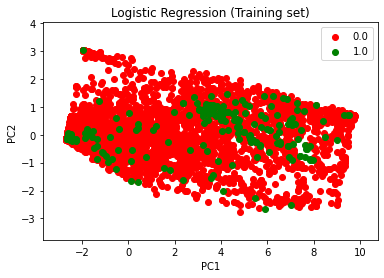

In [33]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('white', 'black', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


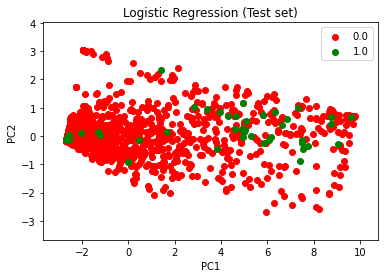

In [34]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('white', 'black', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('r', 'g', 'b'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

In [35]:
# components
pca.components_

array([[-0.21199277,  0.25362452,  0.28496027,  0.29076296,  0.28939174,
         0.28816866,  0.29097812,  0.28638392,  0.28877517,  0.27729221,
         0.28378038,  0.27257244,  0.27641695],
       [-0.9151514 ,  0.02981385, -0.12371595, -0.09880275, -0.17715743,
        -0.05622056, -0.03360534, -0.17632902,  0.00172707, -0.18059422,
         0.0977627 , -0.09453174,  0.13661488]])

In [36]:
pca.explained_variance_ratio_

array([0.86761799, 0.04220118])